<a href="https://colab.research.google.com/github/rabbi123080/A-Comparative-Study-of-Classification-Approaches-for-COVID-19-Prediction/blob/main/03_Covid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import keras
from keras.layers import *
from keras.models import * 

In [ ]:
model = Sequential()

In [ ]:
model.add(Conv2D(64, (3, 3), input_shape = (64, 64, 3), activation ='relu'))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

In [ ]:
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

In [ ]:
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

In [ ]:
model.add(Flatten())

In [ ]:
import tensorflow as tf
tf.keras.metrics.AUC(
    num_thresholds=200,
    curve="ROC",
    summation_method="interpolation",
    name=None,
    dtype=None,
    thresholds=None,
    multi_label=False,
    label_weights=None,
)
tf.keras.metrics.Precision(
    thresholds=None, top_k=None, class_id=None, name=None, dtype=None
)
tf.keras.metrics.Recall(
    thresholds=None, top_k=None, class_id=None, name=None, dtype=None
)


In [ ]:
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=256, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))

In [ ]:
model.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy', tf.keras.metrics.AUC(), tf.keras.metrics.Precision(), tf.keras.metrics.Recall(), sensitivity, specificity])

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 62, 62, 64)        1792      
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 60, 60, 64)        36928     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 28, 28, 128)       73856     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 14, 14, 128)       0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 12, 12, 128)       147584    
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 6, 6, 128)        

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
        rescale=1./255, # Normalizing the scale of the pixels
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

training_set = train_datagen.flow_from_directory('/content/drive/My Drive/Covid1200/Train',
                                                 target_size=(64, 64),
                                                 batch_size=32,
                                                 class_mode='binary')

test_set = test_datagen.flow_from_directory('/content/drive/My Drive/Covid1200/Test',
                                            target_size=(64, 64),
                                            batch_size=32,
                                            class_mode='binary')

model.fit_generator(training_set,
                         steps_per_epoch = (1986/32),
                         epochs = 100,
                         validation_data = test_set,
                         validation_steps = (495/32))

Found 1986 images belonging to 2 classes.
Found 495 images belonging to 2 classes.
Epoch 1/100
63/62 [==============================] - 84s 1s/step - loss: 0.6903 - accuracy: 0.5312 - auc_5: 0.5222 - precision_5: 0.4968 - recall_5: 0.2168 - sensitivity: 0.3902 - specificity: 0.6654 - val_loss: 0.6463 - val_accuracy: 0.5293 - val_auc_5: 0.5423 - val_precision_5: 0.5297 - val_recall_5: 0.4684 - val_sensitivity: 1.0000 - val_specificity: 0.0809
Epoch 2/100
63/62 [==============================] - 82s 1s/step - loss: 0.6417 - accuracy: 0.6435 - auc_5: 0.5848 - precision_5: 0.5514 - recall_5: 0.5816 - sensitivity: 0.7259 - specificity: 0.5482 - val_loss: 0.4563 - val_accuracy: 0.7354 - val_auc_5: 0.6348 - val_precision_5: 0.5768 - val_recall_5: 0.6351 - val_sensitivity: 0.9470 - val_specificity: 0.5293
Epoch 3/100
63/62 [==============================] - 82s 1s/step - loss: 0.6056 - accuracy: 0.6793 - auc_5: 0.6673 - precision_5: 0.5962 - recall_5: 0.6679 - sensitivity: 0.7361 - specificity

In [ ]:
model.evaluate_generator(training_set)

[0.44834402203559875,
 0.7426989078521729,
 0.7710085511207581,
 0.69087815284729,
 0.7266839146614075,
 0.8210978507995605,
 0.6717641949653625]

In [ ]:
print(model.evaluate_generator(test_set))

[0.47043731808662415, 0.7535353302955627, 0.7810152173042297, 0.6968320608139038, 0.7469966411590576, 0.8698952198028564, 0.6433081030845642]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.layers import *
from keras.models import * 
from keras.preprocessing import image

In [ ]:
import os
training_set.class_indices

{'Covid': 0, 'NonCovid': 1}

In [ ]:
y_actual, y_test = [],[]

In [ ]:
for i in os.listdir("/content/drive/My Drive/Covid1200/Test/NonCovid/"):
    img=image.load_img("/content/drive/My Drive/Covid1200/Test/NonCovid/"+i,target_size=(64,64))
    img=image.img_to_array(img)
    img=np.expand_dims(img,axis=0)
    pred=model.predict_classes(img)
    y_test.append(pred[0,0])
    y_actual.append(1)

In [ ]:
for i in os.listdir("/content/drive/My Drive/Covid1200/Test/Covid/"):
    img=image.load_img("/content/drive/My Drive/Covid1200/Test/Covid/"+i,target_size=(64,64))
    img=image.img_to_array(img)
    img=np.expand_dims(img,axis=0)
    pred=model.predict_classes(img)
    y_test.append(pred[0,0])
    y_actual.append(0)

In [ ]:
y_actual=np.array(y_actual)
y_test=np.array(y_test)

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cn=confusion_matrix(y_actual,y_test)

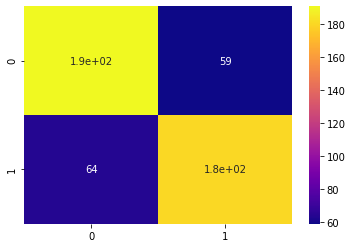

In [ ]:
sns.heatmap(cn,cmap="plasma",annot=True) #0: Covid ; 1: Normal

In [ ]:
confusion_matrix(y_actual,y_test)

array([[191,  59],
       [ 64, 181]])

In [ ]:
from keras import backend as K

def sensitivity(y_actual, y_test):
    true_positives = K.sum(K.round(K.clip(y_actual * y_test, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_actual, 0, 1)))
    return true_positives / (possible_positives + K.epsilon())

def specificity(y_actual, y_test):
    true_negatives = K.sum(K.round(K.clip((1-y_actual) * (1-y_test), 0, 1)))
    possible_negatives = K.sum(K.round(K.clip(1-y_actual, 0, 1)))
    return true_negatives / (possible_negatives + K.epsilon())


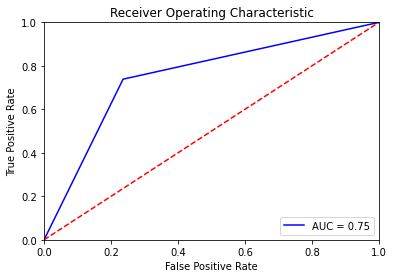

In [ ]:
import sklearn.metrics as metrics
fpr, tpr, threshold = metrics.roc_curve(y_actual, y_test)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()